## From Noise to Clarity: A Study of Filtering Techniques in Biomedical Imaging

### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, cauchy, uniform
sns.set(style="whitegrid")

#### 2.1.a : Applying LPF and HPF

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
C:\Users\moein\AppData\Local\Temp\ipykernel_26208\419166484.py:32: SyntaxWarning: invalid escape sequence '\p'
  image = cv2.imread("pics\pic1.jpg")


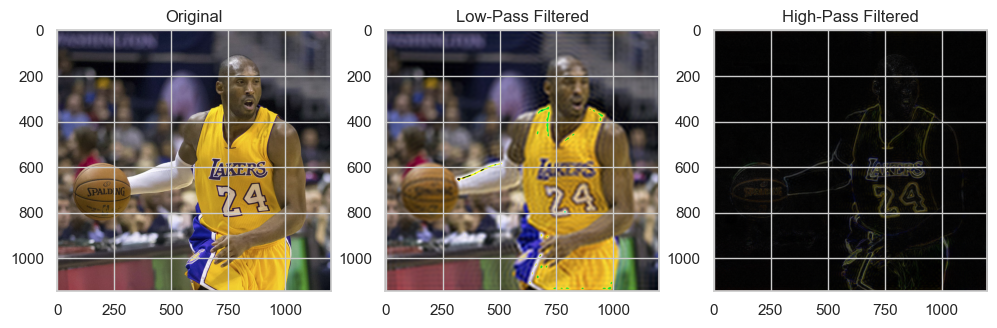

In [55]:
def filterOfChannel(channel, mask_type, cutoff):
    dft = np.fft.fft2(channel)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2 # center
    mask = np.ones((rows, cols), np.uint8) if mask_type == "HPF" else np.zeros((rows, cols), np.uint8)
    if mask_type == "LPF":
        mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    else:
        mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0 
    dft_shift *= mask
    dft_ishift = np.fft.ifftshift(dft_shift)
    filtered_channel = np.fft.ifft2(dft_ishift)
    filtered_channel = np.abs(filtered_channel)
    return filtered_channel

def lowPassFilter(image, cutoff):
    b, g, r = cv2.split(image)
    b_filtered = filterOfChannel(b, "LPF", cutoff)
    g_filtered = filterOfChannel(g, "LPF", cutoff)
    r_filtered = filterOfChannel(r, "LPF", cutoff)
    return cv2.merge([b_filtered, g_filtered, r_filtered])

def highPassFilter(image, cutoff):
    b, g, r = cv2.split(image)
    b_filtered = filterOfChannel(b, "HPF", cutoff)
    g_filtered = filterOfChannel(g, "HPF", cutoff)
    r_filtered = filterOfChannel(r, "HPF", cutoff)
    return cv2.merge([b_filtered, g_filtered, r_filtered])

cutoff = 50
image = cv2.imread("pics\pic1.jpg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
lpf_image = lowPassFilter(image, cutoff)
hpf_image = highPassFilter(image, cutoff)

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(lpf_image.astype(np.uint8)), plt.title('Low-Pass Filtered')
plt.subplot(1, 3, 3), plt.imshow(hpf_image.astype(np.uint8)), plt.title('High-Pass Filtered')
plt.show()


#### 2.1.b : Phase and Magnitude of Images

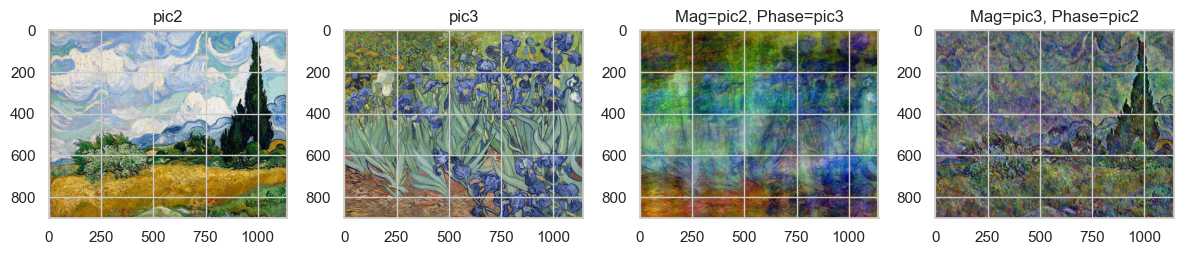

In [56]:
def swapMP(channel1, channel2, method):
    dft1 = np.fft.fft2(channel1)
    dft2 = np.fft.fft2(channel2)
    if method == 1:
        dft_combined = np.abs(dft1) * np.exp(1j * np.angle(dft2))
    else:
        dft_combined = np.abs(dft2) * np.exp(1j * np.angle(dft1))
    channel_reconstructed = np.fft.ifft2(dft_combined)
    channel_reconstructed = np.abs(channel_reconstructed)
    channel_reconstructed = cv2.normalize(channel_reconstructed, None, 0, 255, cv2.NORM_MINMAX)
    return channel_reconstructed.astype(np.uint8)

def createImage(image1, image2, method):
    b1, g1, r1 = cv2.split(image1)
    b2, g2, r2 = cv2.split(image2)
    b_reconstructed = swapMP(b1, b2, method)
    g_reconstructed = swapMP(g1, g2, method)
    r_reconstructed = swapMP(r1, r2, method)
    return cv2.merge([b_reconstructed, g_reconstructed, r_reconstructed])

image1 = cv2.imread("pics/pic2.jpg")  
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("pics/pic3.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

image1_reconstructed = createImage(image1, image2, 1)
image2_reconstructed = createImage(image1, image2, 2)

plt.figure(figsize=(12, 12))
plt.subplot(1,4,1), plt.imshow(image1), plt.title('pic2')
plt.subplot(1, 4, 2), plt.imshow(image2), plt.title('pic3')
plt.subplot(1, 4, 3), plt.imshow(image1_reconstructed.astype(np.uint8)), plt.title('Mag=pic2, Phase=pic3')
plt.subplot(1, 4, 4), plt.imshow(image2_reconstructed.astype(np.uint8)), plt.title('Mag=pic3, Phase=pic2')

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.891555265818115e-22..254.99999999999997].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1415926535897856..3.1415926535897842].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..5.5451775].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1415926535897887..3.1415926535897887].


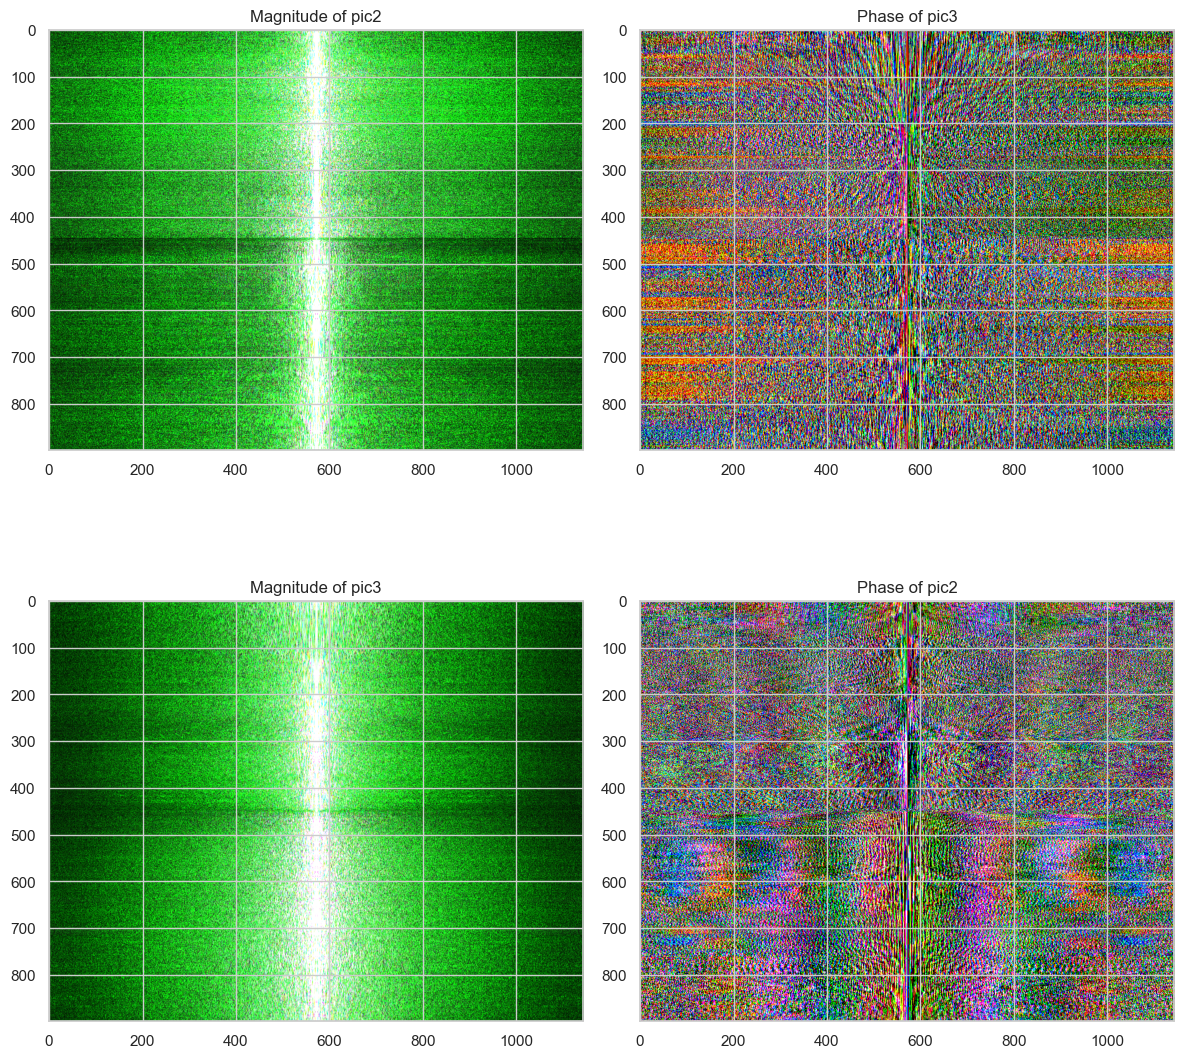

In [57]:
dft1 = np.fft.fft2(image1)
dft2 = np.fft.fft2(image2)
dft1_shift = np.fft.fftshift(dft1)
dft2_shift = np.fft.fftshift(dft2)
mag_image1 = np.abs(dft1_shift)
phase_image2 = np.angle(dft2_shift)
mag_image2 = np.abs(dft2_shift)
phase_image1 = np.angle(dft1_shift)

# Normalize the magnitude images for better visualization
mag_image1 = cv2.normalize(mag_image1, None, 0, 255, cv2.NORM_MINMAX)
mag_image2 = cv2.normalize(mag_image2, None, 0, 255, cv2.NORM_MINMAX)
mag_image2 = mag_image2.astype(np.float32)
mag_image2 = np.log(mag_image2 + 1)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1), plt.imshow(mag_image1, cmap='gray'), plt.title('Magnitude of pic2')
plt.subplot(2,2,2), plt.imshow(phase_image2, cmap='gray'), plt.title('Phase of pic3')
plt.subplot(2,2,3), plt.imshow(mag_image2, cmap='gray'), plt.title('Magnitude of pic3')
plt.subplot(2,2,4), plt.imshow(phase_image1, cmap='gray'), plt.title('Phase of pic2')
plt.tight_layout()
plt.show()

#### 3.2.1 : Function Definition of Noise

In [58]:
def noise(a, L, type):
    if type == "Normal":
        return np.random.normal(0, a, L)
    elif type == "Uniform":
        return np.random.uniform(-a, a, L)

##### 3.2.2(a) : Generate and Plot Noise Vectors

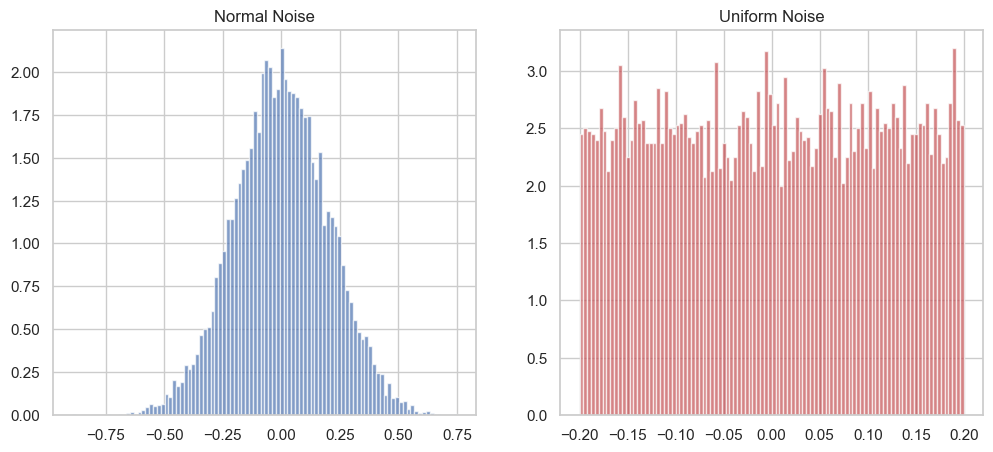

In [59]:
a = 0.2
L = 10000
N1 = noise(a, L, "Normal")
N2 = noise(a, L, "Uniform")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.hist(N1, bins=100, density=True, color='b', alpha=0.7), plt.title('Normal Noise')
plt.subplot(1, 2, 2), plt.hist(N2, bins=100, density=True, color='r', alpha=0.7), plt.title('Uniform Noise')
plt.grid(True)
plt.show()

##### 3.2.2(b) : Mean of Noise Vectors

c:\Users\moein\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\moein\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


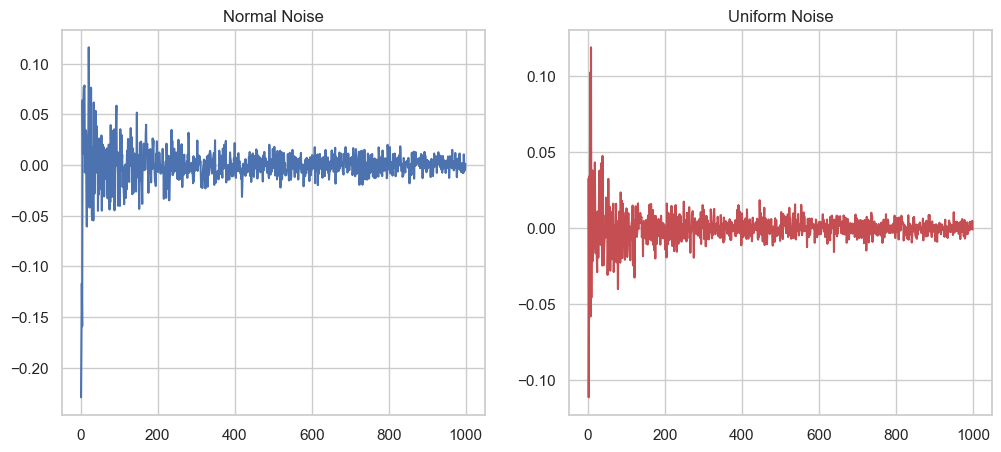

In [60]:
a = 0.2
L = np.arange(0, 1000, 1)
means_normal = []
means_uniform = []
for l in L:
    N1 = noise(a, l, "Normal")
    N2 = noise(a, l, "Uniform")
    means_normal.append(np.mean(N1))
    means_uniform.append(np.mean(N2))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.plot(L, means_normal, color='b'), plt.title('Normal Noise')
plt.subplot(1, 2, 2), plt.plot(L, means_uniform, color='r'), plt.title('Uniform Noise')
plt.grid(True)
plt.show()

##### 3.2.2(c) : Energy of Noise Vectors

C:\Users\moein\AppData\Local\Temp\ipykernel_26208\2138165945.py:8: RuntimeWarning: invalid value encountered in scalar divide
  energy_normal.append(np.sum(N1 ** 2) / l)
C:\Users\moein\AppData\Local\Temp\ipykernel_26208\2138165945.py:9: RuntimeWarning: invalid value encountered in scalar divide
  energy_uniform.append(np.sum(N2 ** 2) / l)


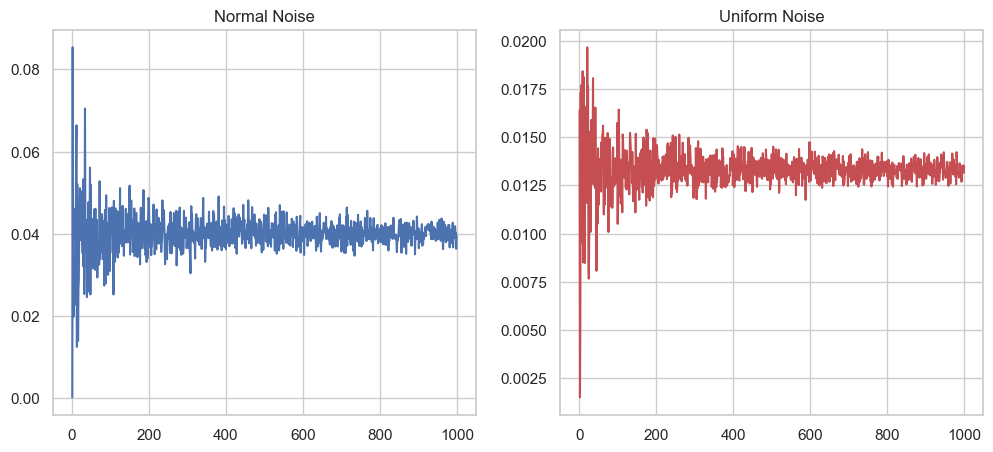

In [61]:
a = 0.2
L = np.arange(0, 1000, 1)
energy_normal = []
energy_uniform = []
for l in L:
    N1 = noise(a, l, "Normal")
    N2 = noise(a, l, "Uniform")
    energy_normal.append(np.sum(N1 ** 2) / l)
    energy_uniform.append(np.sum(N2 ** 2) / l)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.plot(L, energy_normal, color='b'), plt.title('Normal Noise')
plt.subplot(1, 2, 2), plt.plot(L, energy_uniform, color='r'), plt.title('Uniform Noise')
plt.grid(True)
plt.show()

##### 3.2.2(d) : Cross-Correlation of Noise Vectors

C:\Users\moein\AppData\Local\Temp\ipykernel_26208\1779204924.py:7: RuntimeWarning: invalid value encountered in scalar divide
  correlation.append(np.dot(N1, N2.T) / l)


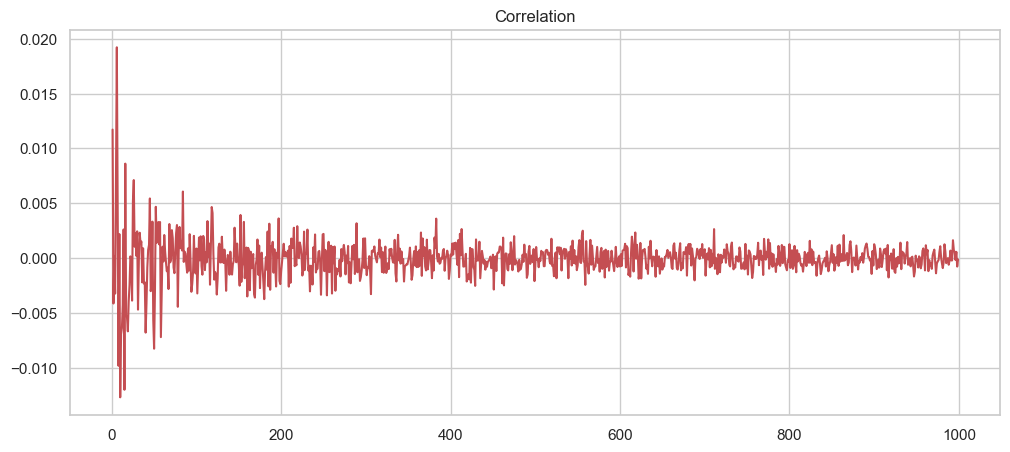

In [62]:
a = 0.2
L = np.arange(0, 1000, 1)
correlation = []
for l in L:
    N1 = noise(a, l, "Normal")
    N2 = noise(a, l, "Uniform")
    correlation.append(np.dot(N1, N2.T) / l)
plt.figure(figsize=(12, 5))
plt.plot(L, correlation, color='r'), plt.title('Correlation')
plt.grid(True)
plt.show()

##### 3.2.3 : Sinusoidal Signal and Noise Addition

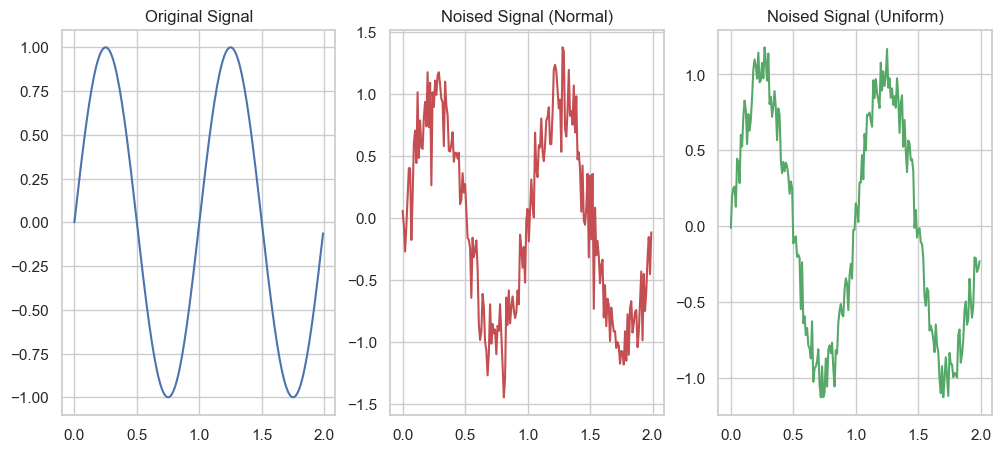

In [63]:
sampling_frequency = 100
frequency = 1
pi = np.pi
t = np.arange(0, 2, 1 / sampling_frequency)
signal = np.sin(2 * pi * frequency * t)
N1 = noise(0.2, len(t), "Normal")
N2 = noise(0.2, len(t), "Uniform")
signal_noised1 = signal + N1
signal_noised2 = signal + N2
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1), plt.plot(t, signal, color='b'), plt.title('Original Signal')
plt.subplot(1, 3, 2), plt.plot(t, signal_noised1, color='r'), plt.title('Noised Signal (Normal)')
plt.subplot(1, 3, 3), plt.plot(t, signal_noised2, color='g'), plt.title('Noised Signal (Uniform)')
plt.grid(True)
plt.show()

##### 3.2.4 : Energy Function Definition

In [64]:
def energyCalculator(signal):
    return np.sum(signal ** 2) / len(signal)

##### 3.2.5 : Energy Computation of Signals

In [65]:
y = np.cos(2 * pi * frequency * t)
signal_energy = energyCalculator(signal)
signal_noised_energy1 = energyCalculator(signal_noised1)
signal_noised_energy2 = energyCalculator(signal_noised2)
noise_energy1 = signal_noised_energy1 - signal_energy
noise_energy2 = signal_noised_energy2 - signal_energy
N1_energy = energyCalculator(N1)
N2_energy = energyCalculator(N2)
print("Energy of Original Signal: ", signal_energy)
print("Energy of Noised Signal (Normal): ", signal_noised_energy1)
print("Energy of Noised Signal (Uniform): ", signal_noised_energy2)
print("Energy of Normal Noise: ", N1_energy)
print("Energy of Noised Signal - Energy of Original Signal (Normal): ", noise_energy1)
print("Energy of Uniform Noise: ", N2_energy)
print("Energy of Noised Signal - Energy of Original Signal (Uniform): ", noise_energy2)
print("Energy of cos(2*pi*f*t): ", energyCalculator(y))
print("Energy of sin(2*pi*f*t): ", energyCalculator(signal))
print("Ex + Ey = ", energyCalculator(signal) + energyCalculator(y))


Energy of Original Signal:  0.5000000000000001
Energy of Noised Signal (Normal):  0.5471423920318592
Energy of Noised Signal (Uniform):  0.5125830363448962
Energy of Normal Noise:  0.04511379288322354
Energy of Noised Signal - Energy of Original Signal (Normal):  0.047142392031859104
Energy of Uniform Noise:  0.01289590770196999
Energy of Noised Signal - Energy of Original Signal (Uniform):  0.012583036344896104
Energy of cos(2*pi*f*t):  0.5
Energy of sin(2*pi*f*t):  0.5000000000000001
Ex + Ey =  1.0


##### 3.2.6 : Signal-to-Noise Ratio (SNR)

The SNR of the signal with normal noise is:  11.083084973463516
The SNR of the signal with uniform noise is:  38.771989654021766


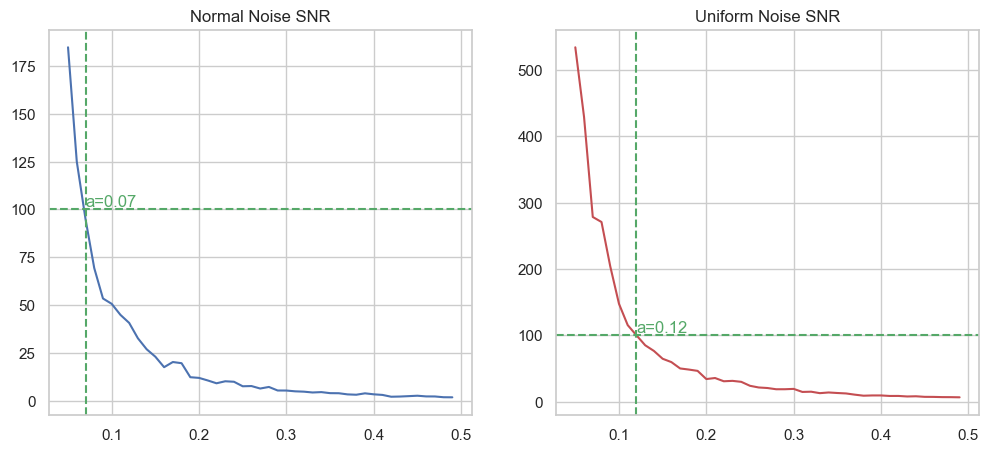

In [66]:
print("The SNR of the signal with normal noise is: ", signal_energy / N1_energy)
print("The SNR of the signal with uniform noise is: ", signal_energy / N2_energy)
a = np.arange(0.05, 0.5, 0.01)
SNR_normal = []
SNR_uniform = []
for i in a:
    N1 = noise(i, len(t), "Normal")
    N2 = noise(i, len(t), "Uniform")
    signal_noised = signal + N1
    signal_energy = energyCalculator(signal)
    noise_energy1 = energyCalculator(N1)
    noise_energy2 = energyCalculator(N2)
    SNR_normal.append(signal_energy / noise_energy1)
    SNR_uniform.append(signal_energy / noise_energy2)
    
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.plot(a, SNR_normal, color='b'), plt.title('Normal Noise SNR'), plt.axhline(y=100, color='g', linestyle='--')
SNR_normal = np.array(SNR_normal)
index = np.argmin(np.abs(SNR_normal-100))
x_intercept2 = a[index]
plt.axvline(x=x_intercept2, color='g', linestyle='--')
plt.text(x_intercept2, 100, f'a={x_intercept2:.2f}', color='g', verticalalignment='bottom')
plt.subplot(1, 2, 2), plt.plot(a, SNR_uniform, color='r'), plt.title('Uniform Noise SNR'), plt.axhline(y=100, color='g', linestyle='--')
SNR_uniform = np.array(SNR_uniform)
index = np.argmin(np.abs(SNR_uniform-100))
x_intercept1 = a[index]
plt.axvline(x=x_intercept1, color='g', linestyle='--')
plt.text(x_intercept1, 100, f'a={x_intercept1:.2f}', color='g', verticalalignment='bottom')
plt.grid(True)
plt.show()

#### 5.1 : Mean Filter

In [14]:
def meanFilter(image, kernel_size):
    h,w = image.shape
    pad_w = kernel_size // 2
    padded_image = np.pad(image, ((pad_w, pad_w), (pad_w, pad_w)), mode='constant', constant_values=0)
    filteredImage = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            kernel = padded_image[i:i+kernel_size, j:j+kernel_size]
            filteredImage[i, j] = np.mean(kernel)
    return filteredImage


#### 5.2 : Gaussian Filter

In [36]:
def gaussianFilter(image, variance, kernel_size):
    h,w = image.shape
    pad_w = kernel_size // 2
    padded_image = np.pad(image, ((pad_w, pad_w), (pad_w, pad_w)), mode='constant', constant_values=0)
    filteredImage = np.zeros((h, w))
    #Gaussian Kernel
    gaussian_kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_w
            y = j - pad_w
            gaussian_kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * variance ** 2))
    gaussian_kernel /= np.sum(gaussian_kernel)
    for i in range(h):
        for j in range(w):
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size]
            filteredImage[i, j] = np.sum(kernel * gaussian_kernel)
    return filteredImage



#### 5.3 : Bilateral Filter

In [18]:
def bilateralFilter(image, sigma_d, sigma_r, kernel_size):
    h, w = image.shape
    pad_w = kernel_size // 2
    padded_image = np.pad(image, ((pad_w, pad_w), (pad_w, pad_w)), mode='constant', constant_values=0)
    filteredImage = np.zeros((h, w))
    # Gaussian Kernel
    gaussian_kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_w
            y = j - pad_w
            gaussian_kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma_d ** 2))
    gaussian_kernel /= np.sum(gaussian_kernel)
    for i in range(h):
        for j in range(w):
            wsb = 0
            filtered_value = 0
            for ii in range(kernel_size):
                for jj in range(kernel_size):
                    spatial_weight = gaussian_kernel[ii, jj]
                    intensity_diff = padded_image[i + ii, j + jj] - padded_image[i + pad_w, j + pad_w]
                    intensity_weight = np.exp(-0.5 * (intensity_diff / sigma_r)**2)
                    weight = spatial_weight * intensity_weight
                    filtered_value += padded_image[i + ii, j + jj] * weight
                    wsb += weight
            if wsb != 0:
                filteredImage[i, j] = filtered_value / wsb
            else:
                filteredImage[i, j] = padded_image[i + pad_w, j + pad_w] 

    return filteredImage


#### 5.4 : Evaluation

C:\Users\moein\AppData\Local\Temp\ipykernel_14852\256373538.py:23: RuntimeWarning: overflow encountered in scalar subtract
  intensity_diff = padded_image[i + ii, j + jj] - padded_image[i + pad_w, j + pad_w]


              Image  Brain MRI (SNR)  Brain MRI (PSNR)  Spine MRI (SNR)  \
0       Mean Filter        13.133308         21.832933         1.036820   
1   Gaussian Filter        15.461028         22.549561         0.856756   
2  Bilateral Filter        23.174708         23.266706         1.261316   

   Spine MRI (PSNR)  
0         10.734045  
1         10.454957  
2         12.492086  


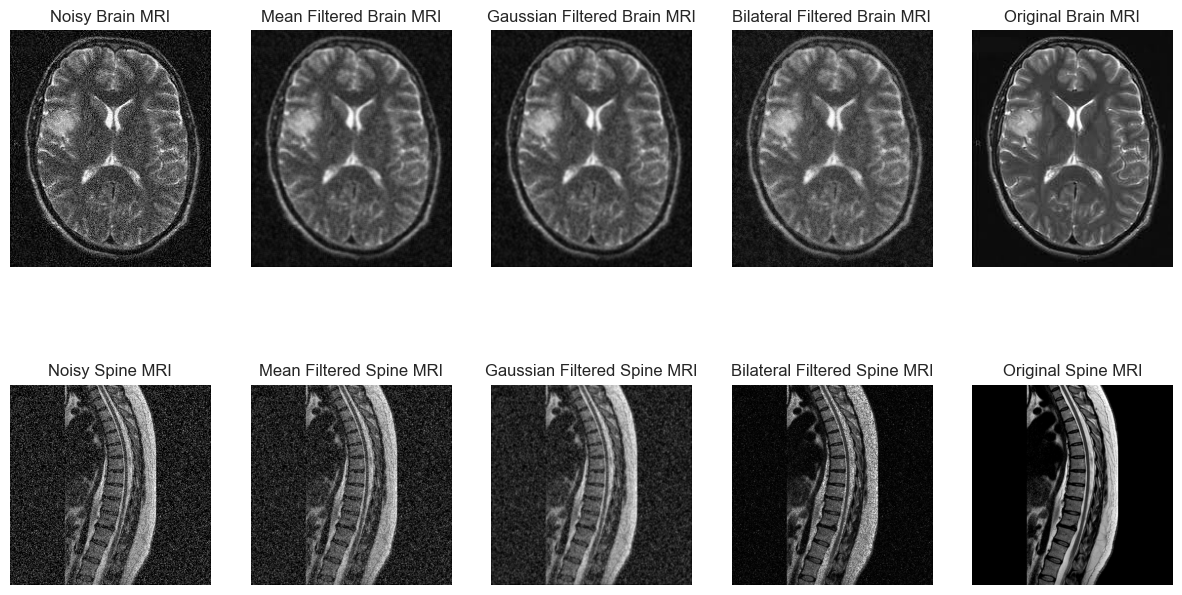

In [40]:
def calculate_psnr(noisy_img, filtered_img):
    mse = np.mean((noisy_img - filtered_img) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

def calculate_snr(noisy_img, filtered_img):
    noise = noisy_img - filtered_img
    signal_power = energyCalculator(filtered_img)
    noise_power = energyCalculator(noise)
    snr = signal_power / noise_power
    return snr

brain_img = cv2.imread('pics/noisy_tumor.jpg', cv2.IMREAD_GRAYSCALE)
spine_img = cv2.imread('pics/noisy_spine.jpg', cv2.IMREAD_GRAYSCALE)
brain_img_original = cv2.imread('pics/tumor_original.jpg', cv2.IMREAD_GRAYSCALE)
spine_img_original = cv2.imread('pics/spine_MRI_image.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Mean Filter
mean_filtered_brain = meanFilter(brain_img, 3)
mean_filtered_spine = meanFilter(spine_img, 3)
# Apply Gaussian Filter
gaussian_filtered_brain = gaussianFilter(brain_img, 1, 4)
gaussian_filtered_spine = gaussianFilter(spine_img, 2, 10)

# Apply Bilateral Filter
bilateral_filtered_brain = bilateralFilter(brain_img, 1, 100, 5)
bilateral_filtered_spine = bilateralFilter(spine_img, 1, 45, 5)

results = []
"""
# Noisy image comparison
results.append({
    'Image': 'Noisy Image',
    'Brain MRI (SNR)': calculate_snr(brain_img_original, brain_img),
    'Brain MRI (PSNR)': calculate_psnr(brain_img_original, brain_img),
    'Spine MRI (SNR)': calculate_snr(spine_img_original, spine_img),
    'Spine MRI (PSNR)': calculate_psnr(spine_img_original, spine_img),
})
"""
# Mean Filter
results.append({
    'Image': 'Mean Filter',
    'Brain MRI (SNR)': calculate_snr(brain_img, mean_filtered_brain),
    'Brain MRI (PSNR)': calculate_psnr(brain_img, mean_filtered_brain),
    'Spine MRI (SNR)': calculate_snr(spine_img, mean_filtered_spine),
    'Spine MRI (PSNR)': calculate_psnr(spine_img, mean_filtered_spine),
})

# Gaussian Filter
results.append({
    'Image': 'Gaussian Filter',
    'Brain MRI (SNR)': calculate_snr(brain_img, gaussian_filtered_brain),
    'Brain MRI (PSNR)': calculate_psnr(brain_img, gaussian_filtered_brain),
    'Spine MRI (SNR)': calculate_snr(spine_img, gaussian_filtered_spine),
    'Spine MRI (PSNR)': calculate_psnr(spine_img, gaussian_filtered_spine),
})

# Bilateral Filter
results.append({
    'Image': 'Bilateral Filter',
    'Brain MRI (SNR)': calculate_snr(brain_img, bilateral_filtered_brain),
    'Brain MRI (PSNR)': calculate_psnr(brain_img, bilateral_filtered_brain),
    'Spine MRI (SNR)': calculate_snr(spine_img, bilateral_filtered_spine),
    'Spine MRI (PSNR)': calculate_psnr(spine_img, bilateral_filtered_spine),
})

df = pd.DataFrame(results)
print(df)

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
plt.grid(False)


axes[0, 0].imshow(brain_img, cmap='gray')
axes[0, 0].set_title('Noisy Brain MRI')
axes[0, 1].imshow(mean_filtered_brain, cmap='gray')
axes[0, 1].set_title('Mean Filtered Brain MRI')
axes[0, 2].imshow(gaussian_filtered_brain, cmap='gray')
axes[0, 2].set_title('Gaussian Filtered Brain MRI')
axes[0, 3].imshow(bilateral_filtered_brain, cmap='gray')
axes[0, 3].set_title('Bilateral Filtered Brain MRI')
axes[0, 4].imshow(brain_img_original, cmap='gray')
axes[0, 4].set_title('Original Brain MRI')


axes[1, 0].imshow(spine_img, cmap='gray')
axes[1, 0].set_title('Noisy Spine MRI')
axes[1, 1].imshow(mean_filtered_spine, cmap='gray')
axes[1, 1].set_title('Mean Filtered Spine MRI')
axes[1, 2].imshow(gaussian_filtered_spine, cmap='gray')
axes[1, 2].set_title('Gaussian Filtered Spine MRI')
axes[1, 3].imshow(bilateral_filtered_spine, cmap='gray')
axes[1, 3].set_title('Bilateral Filtered Spine MRI')
axes[1, 4].imshow(spine_img_original, cmap='gray')
axes[1, 4].set_title('Original Spine MRI')
plt.axis('off')
for ax in axes.flatten():
    ax.axis('off')

plt.axis('off')

plt.show()


#### 6.3 : Adaptive Filters using SGD

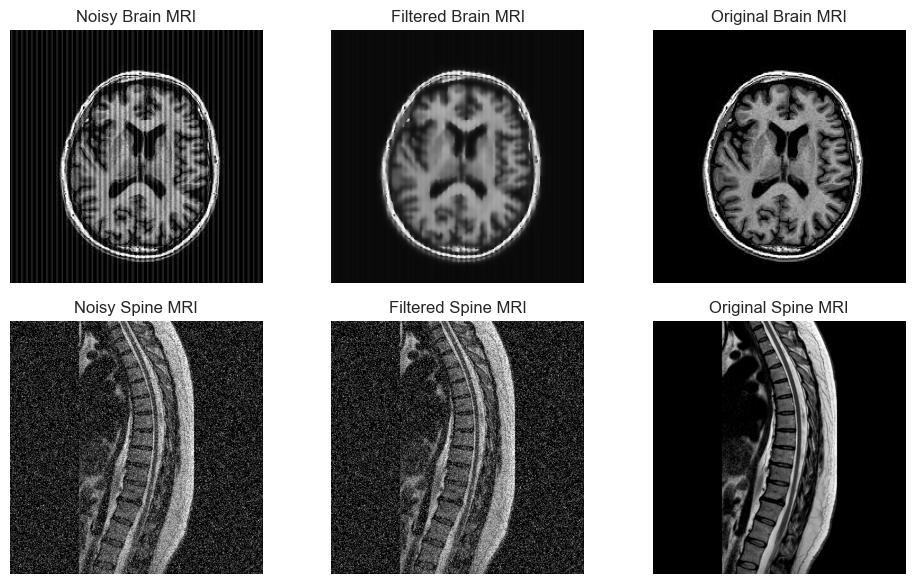

In [47]:
def adaptiveFilter(image, kernel_size, learning_rate, epochs, filter_method):
    h, w = image.shape
    pad_w = kernel_size // 2
    padded_image = np.pad(image, ((pad_w, pad_w), (pad_w, pad_w)), mode='reflect')
    padded_image = padded_image.astype(np.float32)
    epsilon = 1e-6
    for i in range(epochs):
        local_mean = cv2.GaussianBlur(padded_image, (kernel_size, kernel_size), 0.9)
        local_var = cv2.GaussianBlur(padded_image**2, (kernel_size, kernel_size), 0.9) - local_mean**2
        if (filter_method == 'Gaussian'):
            local_mean = cv2.GaussianBlur(padded_image, (kernel_size, kernel_size), 0.8)
            local_var = cv2.GaussianBlur(padded_image**2, (kernel_size, kernel_size), 0.8) - local_mean**2
        else:
#            local_mean = bilateralFilter(padded_image, 1, 45, kernel_size)
#           local_var = bilateralFilter(padded_image**2, 1, 45, kernel_size) - local_mean**2

            # Normalize the image to [0, 1] if necessary (for better processing with float images)
            local_mean = cv2.bilateralFilter(padded_image, kernel_size, 10, 10)
            local_var = cv2.bilateralFilter(padded_image**2, kernel_size, 10, 10) - local_mean**2
        noise_var = np.mean(local_var)  
        wien_coef = local_var / (local_var + noise_var + epsilon)
        estimate = local_mean + wien_coef * (padded_image - local_mean)
        padded_image = padded_image + learning_rate * (estimate - padded_image)

    filteredImage = padded_image[pad_w:h+pad_w, pad_w:w+pad_w]
    filteredImage = np.clip(filteredImage, 0, 255)
    return np.uint8(np.clip(filteredImage, 0, 255))

brain_img = cv2.imread('pics/noisy_image_50.jpg', cv2.IMREAD_GRAYSCALE)
brain_img_original = cv2.imread('pics/original_2.jpg', cv2.IMREAD_GRAYSCALE)
filtered_brain_image = adaptiveFilter(brain_img, kernel_size=5, learning_rate=0.09, epochs=80, filter_method='Gaussian')
spine_img = cv2.imread('pics/noisy_spine.jpg', cv2.IMREAD_GRAYSCALE)
spine_img_original = cv2.imread('pics/spine_MRI_image.jpg', cv2.IMREAD_GRAYSCALE)
filtered_spine_image = adaptiveFilter(spine_img, kernel_size=3, learning_rate=0.01, epochs=80, filter_method='Bilateral')


plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Noisy Brain MRI')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(filtered_brain_image, cmap='gray')
plt.title('Filtered Brain MRI')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(brain_img_original, cmap='gray')
plt.title('Original Brain MRI')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(spine_img, cmap='gray')
plt.title('Noisy Spine MRI')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(filtered_spine_image, cmap='gray')
plt.title('Filtered Spine MRI')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(spine_img_original, cmap='gray')
plt.title('Original Spine MRI')
plt.axis('off')

plt.tight_layout()
plt.show()


#### 6.4 : Evaluate SNR and PSNR

             Image  Brain MRI (SNR)  Brain MRI (PSNR)  Spine MRI (SNR)  \
0  Adaptive Filter          1.29607          27.92259        36.266215   

   Spine MRI (PSNR)  
0         48.852381  


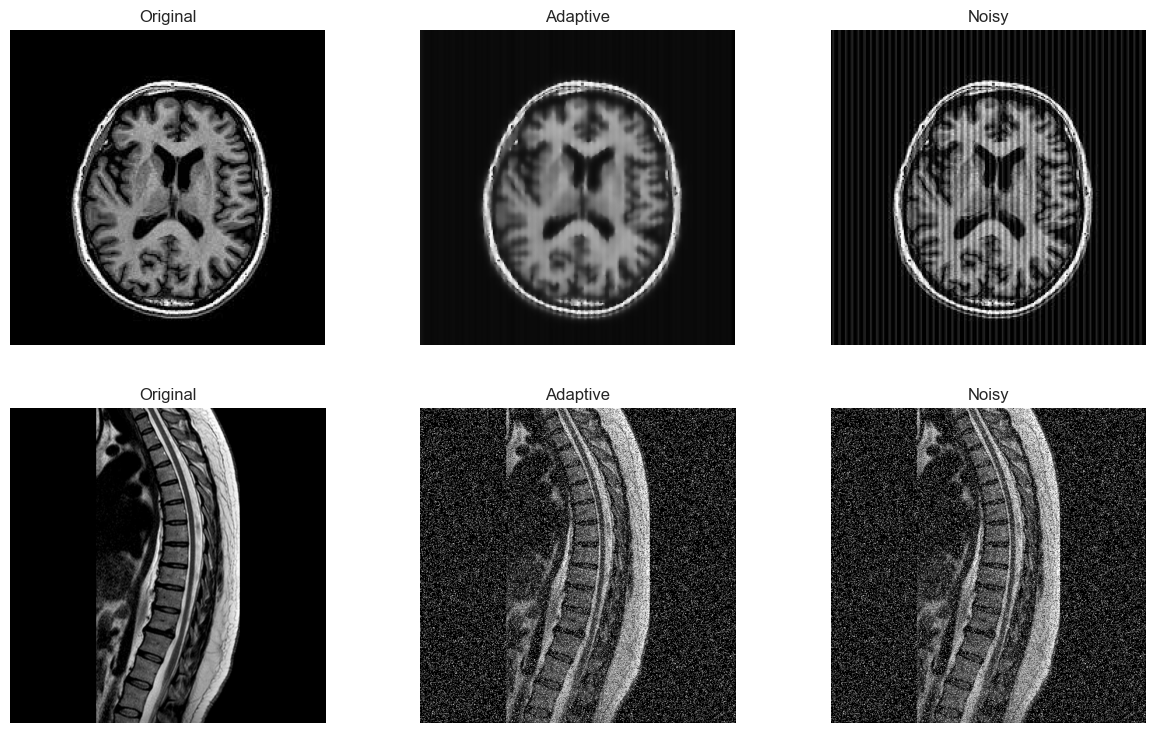

In [54]:
results = []
results.append({
    'Image': 'Adaptive Filter',
    'Brain MRI (SNR)': calculate_snr(brain_img, filtered_brain_image),
    'Brain MRI (PSNR)': calculate_psnr(brain_img, filtered_brain_image),
    'Spine MRI (SNR)': calculate_snr(spine_img, filtered_spine_image),
    'Spine MRI (PSNR)': calculate_psnr(spine_img, filtered_spine_image),
})

df = pd.DataFrame(results)
print(df)

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
plt.grid(False)


axes[0,0].imshow(brain_img_original, cmap='gray')
axes[0,0].set_title('Original')
axes[0,1].imshow(filtered_brain_image, cmap='gray')
axes[0,1].set_title('Adaptive')
axes[0,2].imshow(brain_img, cmap='gray')
axes[0,2].set_title('Noisy')
axes[1,0].imshow(spine_img_original, cmap='gray')
axes[1,0].set_title('Original')
axes[1,1].imshow(filtered_spine_image, cmap='gray')
axes[1,1].set_title('Adaptive')
axes[1,2].imshow(spine_img, cmap='gray')
axes[1,2].set_title('Noisy')

for ax in axes.flatten():
    ax.axis('off')

plt.axis('off')

plt.show()